In [1]:
import cv2
import numpy as np
import h5py
import matplotlib.pyplot as plt 
# from diffusion_policy.model.common.rotation_transformer import RotationTransformer

In [13]:
dataset_path_robocasa = '../robocasa/datasets_first/v0.1/single_stage/kitchen_drawer/CloseDrawer/2024-04-30/demo_gentex_im128_randcams_im256.hdf5'


<KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_11', 'demo_12', 'demo_13', 'demo_14', 'demo_15', 'demo_16', 'demo_17', 'demo_18', 'demo_19', 'demo_2', 'demo_20', 'demo_21', 'demo_22', 'demo_23', 'demo_24', 'demo_25', 'demo_26', 'demo_27', 'demo_28', 'demo_29', 'demo_3', 'demo_30', 'demo_31', 'demo_32', 'demo_33', 'demo_34', 'demo_35', 'demo_36', 'demo_37', 'demo_38', 'demo_39', 'demo_4', 'demo_40', 'demo_41', 'demo_42', 'demo_43', 'demo_44', 'demo_45', 'demo_46', 'demo_47', 'demo_48', 'demo_49', 'demo_5', 'demo_50', 'demo_51', 'demo_6', 'demo_7', 'demo_8', 'demo_9']>
Keys: <KeysViewHDF5 ['object', 'robot0_agentview_left_image', 'robot0_agentview_right_image', 'robot0_base_pos', 'robot0_base_quat', 'robot0_base_to_eef_pos', 'robot0_base_to_eef_quat', 'robot0_base_to_eef_quat_site', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eef_quat_site', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_acc', 'robot0_joint_pos', 'robot0_joint_pos_cos', 'robo

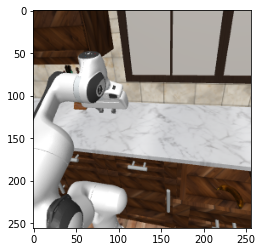

In [14]:
demos=None
img = None
with h5py.File(dataset_path_robocasa) as file:
    # count total steps
    print(file['data'].keys())
    for key in file['data'].keys():
        demos = file['data'][key]['obs']
        print("Keys: %s" % demos.keys())
        print("Keys: %s" % file['data'][key].keys())
        # visualize image is cv2 video
        vid_data_cam1 = demos['robot0_agentview_left_image'] # shape (127, 84, 84, 3)
        vid_data_cam2 = demos['robot0_agentview_right_image'] # shape (127, 84, 84, 3)
        print("vid_data_cam1", vid_data_cam1.shape)
        print("vid_data_cam2", vid_data_cam2.shape)
        img = vid_data_cam2[0]
        plt.imshow(img)
        plt.show()
        plt.close()
        break

In [5]:
dataset_path_robocasa = '../robocasa/datasets_first/v0.1/single_stage/kitchen_drawer/CloseDrawer/2024-04-30/demo_gentex_im128_randcams.hdf5'


<KeysViewHDF5 ['demo_1', 'demo_10', 'demo_11', 'demo_12', 'demo_13', 'demo_14', 'demo_15', 'demo_16', 'demo_17', 'demo_18', 'demo_19', 'demo_2', 'demo_20', 'demo_21', 'demo_22', 'demo_23', 'demo_24', 'demo_25', 'demo_26', 'demo_27', 'demo_28', 'demo_29', 'demo_3', 'demo_30', 'demo_31', 'demo_32', 'demo_33', 'demo_34', 'demo_35', 'demo_36', 'demo_37', 'demo_38', 'demo_39', 'demo_4', 'demo_40', 'demo_41', 'demo_42', 'demo_43', 'demo_44', 'demo_45', 'demo_46', 'demo_47', 'demo_48', 'demo_49', 'demo_5', 'demo_50', 'demo_51', 'demo_52', 'demo_53', 'demo_54', 'demo_6', 'demo_7', 'demo_8', 'demo_9']>
Keys: <KeysViewHDF5 ['object', 'robot0_agentview_left_image', 'robot0_agentview_right_image', 'robot0_base_pos', 'robot0_base_quat', 'robot0_base_to_eef_pos', 'robot0_base_to_eef_quat', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel']>
Keys: <KeysVi

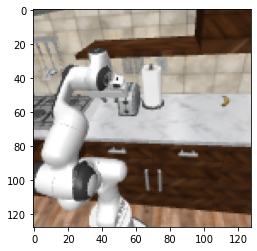

In [6]:
demos=None
img = None
with h5py.File(dataset_path_robocasa) as file:
    # count total steps
    print(file['data'].keys())
    for key in file['data'].keys():
        demos = file['data'][key]['obs']
        print("Keys: %s" % demos.keys())
        print("Keys: %s" % file['data'][key].keys())
        # visualize image is cv2 video
        vid_data_cam1 = demos['robot0_agentview_left_image'] # shape (127, 84, 84, 3)
        vid_data_cam2 = demos['robot0_agentview_right_image'] # shape (127, 84, 84, 3)
        print("vid_data_cam1", vid_data_cam1.shape)
        print("vid_data_cam2", vid_data_cam2.shape)
        img = vid_data_cam2[0]
        plt.imshow(img)
        plt.show()
        plt.close()
        break

In [7]:
demos=None
dim_to_list_vals = {}
with h5py.File(dataset_path_robocasa) as file:
    # count total steps
    print("Keys: %s" % file['data']['demo_1']['obs'].keys())
    actions = file['data']['demo_1']['actions']
    print("actions shape", actions.shape)
    print("ROBOCASA actions[0]", actions[60])
    for act in actions:
        for i in range(len(act)):
            if i not in dim_to_list_vals:
                dim_to_list_vals[i] = []
            dim_to_list_vals[i].append(act[i])
#     for act in actions:
#         print(act)
        
    print()
    robot0_eef_pos = file['data']['demo_1']['obs']['robot0_eef_pos']
    print("robot0_eef_pos shape", robot0_eef_pos.shape)
    print("ROBOCASA robot0_eef_pos[0]", robot0_eef_pos[-1])
    
    robot0_eef_quat = file['data']['demo_1']['obs']['robot0_eef_quat']
    print("robot0_eef_quat shape", robot0_eef_quat.shape)
    print("ROBOCASA robot0_eef_quat[0]", robot0_eef_quat[-1])
    
    robot0_gripper_qpos = file['data']['demo_1']['obs']['robot0_gripper_qpos']
    print("robot0_gripper_qpos shape", robot0_gripper_qpos.shape)
    print("ROBOCASA robot0_gripper_qpos[0]", robot0_gripper_qpos[-1])
    
    

Keys: <KeysViewHDF5 ['object', 'robot0_agentview_left_image', 'robot0_agentview_right_image', 'robot0_base_pos', 'robot0_base_quat', 'robot0_base_to_eef_pos', 'robot0_base_to_eef_quat', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel']>
actions shape (189, 12)
ROBOCASA actions[0] [-0.58571429  0.26428571 -0.40714286 -0.30857143 -0.05142857  0.32285714
 -1.          0.         -0.          0.          0.         -1.        ]

robot0_eef_pos shape (189, 3)
ROBOCASA robot0_eef_pos[0] [ 3.11246564 -0.60925575  0.82230039]
robot0_eef_quat shape (189, 4)
ROBOCASA robot0_eef_quat[0] [-0.5741627   0.54404257  0.40901484  0.45504036]
robot0_gripper_qpos shape (189, 2)
ROBOCASA robot0_gripper_qpos[0] [ 0.03911062 -0.04088979]


In [17]:
dataset_path_robocasa256 = 'datasets/v0.1/single_stage/kitchen_pnp/PnPCabToCounter/2024-04-24/demo_gentex_im256_randcams.hdf5'


In [18]:
demos=None
img = None
with h5py.File(dataset_path_robocasa256) as file:
    # count total steps
    demos = file['data']['demo_1']['obs']
    print("Keys: %s" % demos.keys())
    # visualize image is cv2 video
    vid_data_cam1 = demos['robot0_agentview_left_image'] # shape (127, 84, 84, 3)
    vid_data_cam2 = demos['robot0_eye_in_hand_image'] # shape (127, 84, 84, 3)
    print("vid_data_cam1", vid_data_cam1.shape)
    print("vid_data_cam2", vid_data_cam2.shape)
    img = vid_data_cam2[0]


Keys: <KeysViewHDF5 ['object', 'robot0_agentview_left_image', 'robot0_agentview_right_image', 'robot0_base_pos', 'robot0_base_quat', 'robot0_base_to_eef_pos', 'robot0_base_to_eef_quat', 'robot0_base_to_eef_quat_site', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eef_quat_site', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel']>
vid_data_cam1 (276, 256, 256, 3)
vid_data_cam2 (276, 256, 256, 3)


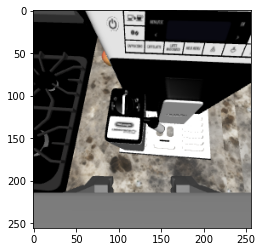

In [19]:
plt.imshow(img)
plt.show()

In [20]:
demos=None
with h5py.File(dataset_path_robocasa256) as file:
    # count total steps
    demos = file['data']['demo_1']['obs']
    print("Keys: %s" % demos.keys())
    # visualize image is cv2 video
    vid_data_cam1 = demos['robot0_agentview_left_image'] # shape (127, 84, 84, 3)
    vid_data_cam2 = demos['robot0_eye_in_hand_image'] # shape (127, 84, 84, 3)
    print("vid_data_cam1", vid_data_cam1.shape)


    # Set the video codec and create a VideoWriter to save the video if necessary
    # For displaying, no need for VideoWriter, just use cv2.imshow to display the images

    for frame1, frame2 in zip(vid_data_cam1, vid_data_cam2):
        frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
        frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
        # Concatenate the two frames side by side
        combined_frame = np.concatenate((frame1, frame2), axis=1)  # Concatenate along the horizontal axis

        # Show the combined frame
        cv2.imshow('Side-by-side Video', combined_frame)

        # Wait for a key press and check if the user wants to close the window
        if cv2.waitKey(100) & 0xFF == ord('q'):  # 30ms delay, 'q' to quit
            break

    # Release the window and close it
    cv2.destroyAllWindows()

Keys: <KeysViewHDF5 ['object', 'robot0_agentview_left_image', 'robot0_agentview_right_image', 'robot0_base_pos', 'robot0_base_quat', 'robot0_base_to_eef_pos', 'robot0_base_to_eef_quat', 'robot0_base_to_eef_quat_site', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eef_quat_site', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel']>
vid_data_cam1 (276, 256, 256, 3)


KeyboardInterrupt: 